In [2]:
# imports and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# write .csvs to dataframes
medicare_df = pd.read_csv('Medicare_Part_D_Cleaned.csv')
by_county_df = pd.read_csv('data_file.csv')
death_totals_df = pd.read_csv('Provisional_Death_Totals_CLEANED.csv')
pop_import_df = pd.read_csv('nst-est2020-alldata.csv')
pop_import_2_df = pd.read_csv('NST-EST2021-alldata.csv')

In [4]:
pop_df = pop_import_df[['NAME','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018','POPESTIMATE2019','POPESTIMATE2020']]
pop_2_df = pop_import_2_df['POPESTIMATE2021']
pop_total_df = pd.concat([pop_df, pop_2_df], axis=1)
pop_total_df.columns = ['State', '2013','2014','2015','2016','2017','2018','2019','2020','2021']
pop_total_df.head(15)

,State,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,United States,316059947,318386329,320738994,323071755,325122128,326838199,328329953,329484123,331893745
1,Northeast Region,55912775,56021339,56052790,56063777,56083383,56084543,56002934,55849869,57159838
2,Midwest Region,67576524,67765576,67885682,68018175,68160342,68263019,68340091,68316744,68841444
3,South Region,118397213,119666248,121049223,122419547,123611036,124649156,125686544,126662754,127225329
4,West Region,74173435,74933166,75751299,76570256,77267367,77841481,78300384,78654756,78667134
5,Alabama,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532,5039877
6,Alaska,737626,737075,738430,742575,740983,736624,733603,731158,732673
7,Arizona,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401,7276316
8,Arkansas,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3030522,3025891
9,California,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39368078,39237836


In [5]:
medicare_df.head(10)

,Year,Prscrbr_Geo_Lvl,FIPS,Prscrbr_Geo_Desc,RUCA,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,5Y_Chg,1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_5Y_Chg,LA_1Y_Chg
0,2021,National,NaN,National,NaN,Overall,1286336.0,784670.0,61178886.0,1.498083e+09,4.08,-1.24,-0.14,6059331.0,9.90,-2.98,-0.63
1,2021,National,NaN,National,NaN,Rural,138060.0,93478.0,10635915.0,2.542085e+08,4.18,-1.31,-0.14,980797.0,9.22,-3.00,-0.52
2,2021,National,NaN,National,NaN,Urban,1147131.0,690502.0,50501915.0,1.242983e+09,4.06,-1.23,-0.14,5736336.5,11.36,-2.61,-0.63
3,2021,State,1.0,Alabama,NaN,Overall,16377.0,9653.0,1700995.0,2.836658e+07,6.00,-1.47,-0.20,115986.0,6.82,-3.14,-0.40
4,2021,State,2.0,Alaska,NaN,Overall,2872.0,1847.0,83652.0,1.711086e+06,4.89,-2.05,0.14,13679.0,16.35,-2.94,-0.20
5,2021,State,4.0,Arizona,NaN,Overall,27033.0,16049.0,1261909.0,2.643251e+07,4.77,-1.82,-0.18,153263.0,12.15,-4.21,-0.70
6,2021,State,5.0,Arkansas,NaN,Overall,10297.0,7239.0,932572.0,1.771512e+07,5.26,-1.13,-0.14,61237.0,6.57,-3.23,-0.59
7,2021,State,6.0,California,NaN,Overall,131565.0,78983.0,5310187.0,1.365687e+08,3.89,-1.18,-0.13,506513.0,9.54,-2.83,-0.73
8,2021,State,8.0,Colorado,NaN,Overall,22175.0,15254.0,929751.0,1.768881e+07,5.26,-1.85,-0.17,116976.0,12.58,-3.38,-0.50
9,2021,State,9.0,Connecticut,NaN,Overall,18379.0,10380.0,545364.0,1.693076e+07,3.22,-0.92,-0.06,71939.0,13.19,-3.56,-0.78


In [6]:
utah_rural_df = medicare_df[(medicare_df['Prscrbr_Geo_Desc'] == 'Utah') & (medicare_df['Breakout'] == 'Rural')]
utah_urban_df = medicare_df[(medicare_df['Prscrbr_Geo_Desc'] == 'Utah') & (medicare_df['Breakout'] == 'Urban')]
utah_urban_df[['Year','Prscrbr_Geo_Desc','Breakout','Tot_Opioid_Clms','Tot_Clms','Opioid_Prscrbng_Rate']]

,Year,Prscrbr_Geo_Desc,Breakout,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate
159,2021,Utah,Urban,441351.0,7465004.0,5.91
30875,2020,Utah,Urban,442787.0,7227280.0,6.13
60729,2019,Utah,Urban,445966.0,7041591.0,6.33
90517,2018,Utah,Urban,460212.0,6863219.0,6.71
120301,2017,Utah,Urban,488347.0,6790049.0,7.19
150068,2016,Utah,Urban,504029.0,6743684.0,7.47
179872,2015,Utah,Urban,494164.0,6471146.0,7.64
209704,2014,Utah,Urban,470933.0,6017786.0,7.83
239556,2013,Utah,Urban,451509.0,5838968.0,7.73


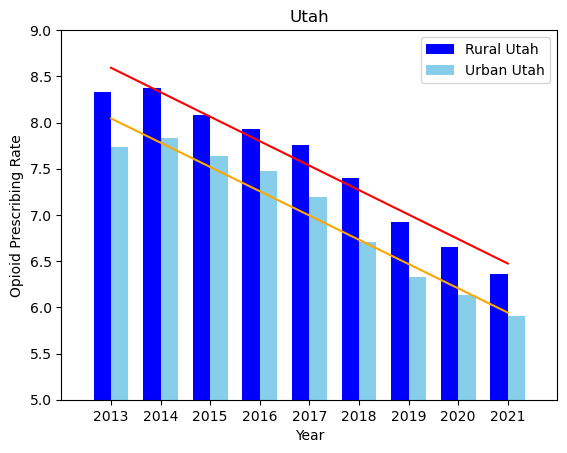

The opioid prescribing rate in urban Utah is decreasing by -0.26% per year on average.

The opioid prescribing rate in rural Utah is decreasing by -0.26% per year on average.


In [7]:
utah_rural_rate = utah_rural_df['Opioid_Prscrbng_Rate']
utah_rural_year = utah_rural_df['Year']
utah_rural_year = utah_rural_year.iloc[::-1]
utah_rural_rate = utah_rural_rate[::-1]

utah_urban_rate = utah_urban_df['Opioid_Prscrbng_Rate']
utah_urban_year = utah_urban_df['Year']
utah_urban_year = utah_urban_year.iloc[::-1]
utah_urban_rate = utah_urban_rate[::-1]

bar_width = 0.35

m1, b1 = np.polyfit(utah_rural_year, utah_rural_rate, 1)
utah_rural_model = m1 * utah_rural_year + b1

m2, b2 = np.polyfit(utah_urban_year, utah_urban_rate, 1)
utah_urban_model = m2 * utah_urban_year + b2

bars1 = plt.bar(utah_rural_year - bar_width/2, utah_rural_rate, bar_width, label='Data 1', color='blue')
bars2 = plt.bar(utah_urban_year + bar_width/2, utah_urban_rate, bar_width, label='Data 2', color='skyblue')
plt.plot(utah_rural_year, utah_rural_model, color='red', label='Line of Best Fit')
plt.plot(utah_urban_year, utah_urban_model, color='orange', label='Line of Best Fit')

plt.xticks(utah_rural_year)
plt.title('Utah')
plt.ylim(5, 9)
plt.xlim(2012, 2022)
plt.xlabel('Year')
plt.ylabel('Opioid Prescribing Rate')

plt.legend([bars1, bars2], ['Rural Utah','Urban Utah'])
plt.show()

print(f"The opioid prescribing rate in urban Utah is decreasing by {m2:.2f}% per year on average.\n")
print(f"The opioid prescribing rate in rural Utah is decreasing by {m1:.2f}% per year on average.")

In [8]:
national_rural_df = medicare_df[(medicare_df['Prscrbr_Geo_Desc'] == 'National') & (medicare_df['Breakout'] == 'Rural')]
national_urban_df = medicare_df[(medicare_df['Prscrbr_Geo_Desc'] == 'National') & (medicare_df['Breakout'] == 'Urban')]

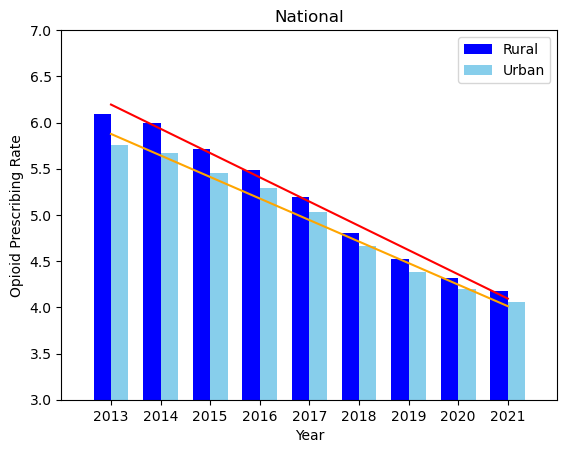

The opioid prescribing rate in urban United States is decreasing by -0.23% per year on average.

The opioid prescribing rate in rural United States is decreasing by -0.26% per year on average.


In [9]:
national_rural_rate = national_rural_df['Opioid_Prscrbng_Rate']
national_rural_year = national_rural_df['Year']
national_rural_year = national_rural_year.iloc[::-1]
national_rural_rate = national_rural_rate[::-1]

national_urban_rate = national_urban_df['Opioid_Prscrbng_Rate']
national_urban_year = national_urban_df['Year']
national_urban_year = national_urban_year.iloc[::-1]
national_urban_rate = national_urban_rate[::-1]

bar_width = 0.35

m1, b1 = np.polyfit(national_rural_year, national_rural_rate, 1)
national_rural_model = m1 * national_rural_year + b1

m2, b2 = np.polyfit(national_urban_year, national_urban_rate, 1)
national_urban_model = m2 * national_urban_year + b2

bars1 = plt.bar(national_rural_year - bar_width/2, national_rural_rate, bar_width, label='Data 1', color='blue')
bars2 = plt.bar(national_urban_year + bar_width/2, national_urban_rate, bar_width, label='Data 2', color='skyblue')
plt.plot(national_rural_year, national_rural_model, color='red', label='Line of Best Fit')
plt.plot(national_urban_year, national_urban_model, color='orange', label='Line of Best Fit')

plt.xticks(national_rural_year)
plt.title('National')
plt.ylim(3, 7)
plt.xlim(2012, 2022)
plt.xlabel('Year')
plt.ylabel('Opioid Prescribing Rate')

plt.legend([bars1, bars2], ['Rural','Urban'])
plt.show()

print(f"The opioid prescribing rate in urban United States is decreasing by {m2:.2f}% per year on average.\n")
print(f"The opioid prescribing rate in rural United States is decreasing by {m1:.2f}% per year on average.")

In [10]:
kentucky_rural_df = medicare_df[(medicare_df['Prscrbr_Geo_Desc'] == 'Kentucky') & (medicare_df['Breakout'] == 'Rural')]
kentucky_urban_df = medicare_df[(medicare_df['Prscrbr_Geo_Desc'] == 'Kentucky') & (medicare_df['Breakout'] == 'Urban')]

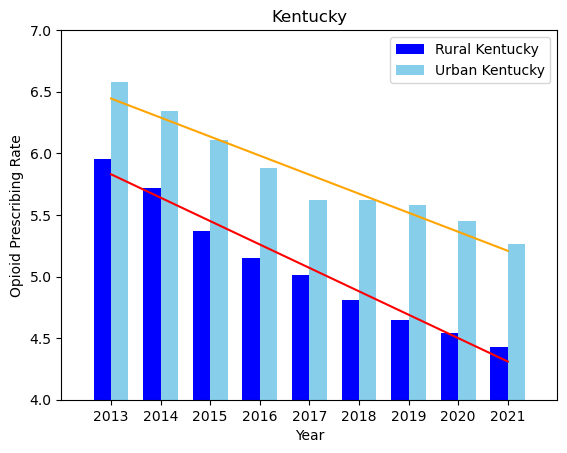

The opioid prescribing rate in urban Kentucky is decreasing by -0.15% per year on average.

The opioid prescribing rate in rural Kentucky is decreasing by -0.19% per year on average.


In [11]:
kentucky_rural_rate = kentucky_rural_df['Opioid_Prscrbng_Rate']
kentucky_rural_year = kentucky_rural_df['Year']
kentucky_rural_year = kentucky_rural_year.iloc[::-1]
kentucky_rural_rate = kentucky_rural_rate[::-1]

kentucky_urban_rate = kentucky_urban_df['Opioid_Prscrbng_Rate']
kentucky_urban_year = kentucky_urban_df['Year']
kentucky_urban_year = kentucky_urban_year.iloc[::-1]
kentucky_urban_rate = kentucky_urban_rate[::-1]

bar_width = 0.35

m1, b1 = np.polyfit(kentucky_rural_year, kentucky_rural_rate, 1)
kentucky_rural_model = m1 * kentucky_rural_year + b1

m2, b2 = np.polyfit(kentucky_urban_year, kentucky_urban_rate, 1)
kentucky_urban_model = m2 * kentucky_urban_year + b2

bars1 = plt.bar(kentucky_rural_year - bar_width/2, kentucky_rural_rate, bar_width, label='Data 1', color='blue')
bars2 = plt.bar(kentucky_urban_year + bar_width/2, kentucky_urban_rate, bar_width, label='Data 2', color='skyblue')
plt.plot(kentucky_rural_year, kentucky_rural_model, color='red', label='Line of Best Fit')
plt.plot(kentucky_urban_year, kentucky_urban_model, color='orange', label='Line of Best Fit')

plt.xticks(kentucky_rural_year)
plt.title('Kentucky')
plt.ylim(4, 7)
plt.xlim(2012, 2022)
plt.xlabel('Year')
plt.ylabel('Opioid Prescribing Rate')

plt.legend([bars1, bars2], ['Rural Kentucky','Urban Kentucky'])
plt.show()

print(f"The opioid prescribing rate in urban Kentucky is decreasing by {m2:.2f}% per year on average.\n")
print(f"The opioid prescribing rate in rural Kentucky is decreasing by {m1:.2f}% per year on average.")

In [12]:
prescriber_df = medicare_df[['Year', 'Prscrbr_Geo_Lvl', 'Prscrbr_Geo_Desc', 'Breakout', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs']]
prescriber_states_df = prescriber_df[(prescriber_df['Prscrbr_Geo_Lvl'] == 'State') & (prescriber_df['Breakout'] == 'Overall')]
prescriber_states_df

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Desc,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs
3,2021,State,Alabama,Overall,16377.0,9653.0
4,2021,State,Alaska,Overall,2872.0,1847.0
5,2021,State,Arizona,Overall,27033.0,16049.0
6,2021,State,Arkansas,Overall,10297.0,7239.0
7,2021,State,California,Overall,131565.0,78983.0
...,...,...,...,...,...,...
239451,2013,State,American Samoa,Overall,3.0,2.0
239452,2013,State,Guam,Overall,117.0,88.0
239453,2013,State,Northern Mariana Islands,Overall,25.0,18.0
239454,2013,State,Puerto Rico,Overall,10881.0,8354.0


In [30]:
year = input("Enter a year between 2013 and 2021: ")
year_int = int(year)
user_df = prescriber_states_df[prescriber_states_df['Year'] == year_int]

if year in pop_total_df.columns:
    user_pop_df = pop_total_df[['State', year]]

user_df.head(10)

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Desc,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs
3,2021,State,Alabama,Overall,16377.0,9653.0
4,2021,State,Alaska,Overall,2872.0,1847.0
5,2021,State,Arizona,Overall,27033.0,16049.0
6,2021,State,Arkansas,Overall,10297.0,7239.0
7,2021,State,California,Overall,131565.0,78983.0
8,2021,State,Colorado,Overall,22175.0,15254.0
9,2021,State,Connecticut,Overall,18379.0,10380.0
10,2021,State,Delaware,Overall,3913.0,2436.0
11,2021,State,District of Columbia,Overall,4919.0,2822.0
12,2021,State,Florida,Overall,84535.0,46407.0


In [31]:
final_df = pd.merge(user_df, user_pop_df, left_on='Prscrbr_Geo_Desc', right_on='State')
final_df['Opioid Prescribers per 100k'] = (final_df['Tot_Opioid_Prscrbrs'] / final_df[year]) * 100000
final_df_sorted = final_df.sort_values(by='Opioid Prescribers per 100k', ascending=False)

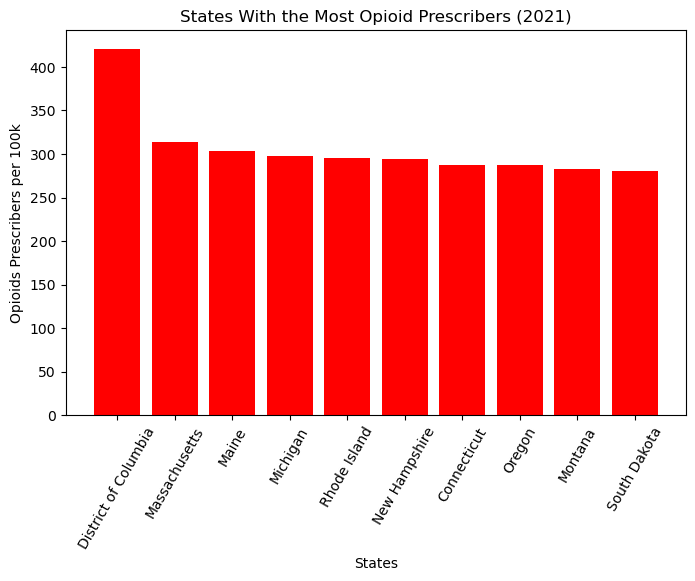

In [32]:
top_10_states = final_df_sorted['State'].head(10)
top_10_values = final_df_sorted['Opioid Prescribers per 100k'].head(10)

plt.figure(figsize=(8, 5))
plt.bar(top_10_states, top_10_values, color='red')
plt.xlabel('States')
plt.ylabel('Opioids Prescribers per 100k')
plt.xticks(rotation=60)
plt.title(f"States With the Most Opioid Prescribers ({year})")
plt.show()

In [35]:
year = input('Input a year from 2013 to 2021')
year_int = int(year)
df = medicare_df[['Year','Prscrbr_Geo_Lvl','Prscrbr_Geo_Desc','Breakout','Opioid_Prscrbng_Rate']][(medicare_df['Year'] == year_int) & (medicare_df['Breakout'] == 'Overall') & (medicare_df['Prscrbr_Geo_Lvl'] == 'State')]
df_sorted = df.sort_values(by='Opioid_Prscrbng_Rate', ascending=False)
extremes_2013 = pd.concat([df_sorted.head(5), df_sorted.tail(5)])
extremes_2013

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Desc,Breakout,Opioid_Prscrbng_Rate
90412,2018,State,American Samoa,Overall,11.67
90361,2018,State,Alabama,Overall,6.90
90405,2018,State,Utah,Overall,6.80
90397,2018,State,Oklahoma,Overall,6.68
90373,2018,State,Idaho,Overall,6.50
90393,2018,State,New York,Overall,2.65
90414,2018,State,Northern Mariana Islands,Overall,1.73
90413,2018,State,Guam,Overall,1.72
90415,2018,State,Puerto Rico,Overall,1.20
90416,2018,State,Virgin Islands,Overall,0.91
